In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [9]:
df=pd.read_csv(r"C:\Users\Admin\Desktop\ML Projects\1_CO2_Simple Linear Regression\Simple Linear Regression/FuelConsumptionCo2.csv")

EDA

In [10]:
df.shape

(1067, 13)

In [11]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [13]:
df2=df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS" ]]

In [14]:
df2.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


array([[<AxesSubplot:title={'center':'ENGINESIZE'}>,
        <AxesSubplot:title={'center':'CYLINDERS'}>],
       [<AxesSubplot:title={'center':'FUELCONSUMPTION_COMB'}>,
        <AxesSubplot:title={'center':'CO2EMISSIONS'}>]], dtype=object)

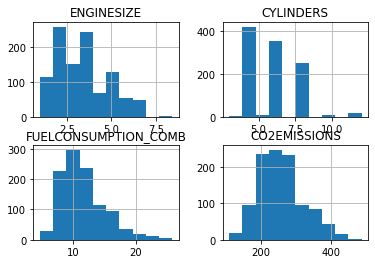

In [15]:
df2.hist()

Text(0, 0.5, 'CO2EMISSIONS')

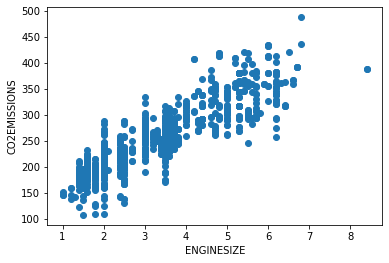

In [17]:
plt.scatter(df.ENGINESIZE,df.CO2EMISSIONS)
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")

Text(0, 0.5, 'CO2EMISSIONS')

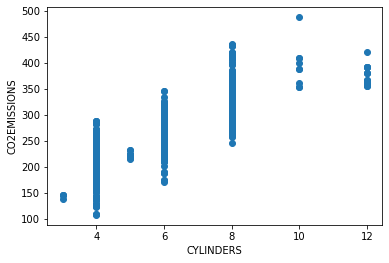

In [18]:
plt.scatter(df.CYLINDERS,df.CO2EMISSIONS)
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")

In [20]:
df["CYLINDERS"].corr(df["CO2EMISSIONS"])

0.8496845920141145

In [21]:
df["FUELCONSUMPTION_COMB"].corr(df["CO2EMISSIONS"])

0.8921285933157568

Split the training and testing data

In [27]:
msk=np.random.rand(len(df))< 0.8
train= df2[msk]
test=df2[~msk]

In [28]:
train.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [29]:
test.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
7,3.7,6,11.1,255
10,2.4,4,9.8,225
15,4.7,8,15.4,354
21,2.0,4,9.3,214
22,2.0,4,10.0,230


In [31]:
train.shape


(853, 4)

In [32]:
test.shape

(214, 4)

In [22]:
# Create the model

In [23]:
from sklearn import linear_model

In [26]:
clf=linear_model.LinearRegression()

Convert features and targets into Array

In [35]:
x_train= np.asanyarray(train[["ENGINESIZE"]])

In [45]:
y_train= np.asanyarray(train[["CO2EMISSIONS"]])

In [46]:
x_test= np.asanyarray(test[["ENGINESIZE"]])

In [47]:
y_test= np.asanyarray(test[["CO2EMISSIONS"]])

In [48]:
# Lets use fit method for traiing

In [49]:
clf.fit(x_train,y_train)

LinearRegression()

In [67]:
c=clf.intercept_

In [68]:
m=clf.coef_


In [69]:
c

array([127.08635835])

In [70]:
m

array([[38.55605508]])

Co2 Emission= m*EngineSize+ C

In [56]:

clf.predict(x_test)


array([[269.74376215],
       [219.62089054],
       [308.29981723],
       [204.19846851],
       [204.19846851],
       [242.75452359],
       [242.75452359],
       [281.31057867],
       [242.75452359],
       [289.02178969],
       [327.57784477],
       [289.02178969],
       [281.31057867],
       [281.31057867],
       [204.19846851],
       [204.19846851],
       [204.19846851],
       [242.75452359],
       [242.75452359],
       [242.75452359],
       [296.7330007 ],
       [296.7330007 ],
       [358.42268883],
       [296.7330007 ],
       [296.7330007 ],
       [296.7330007 ],
       [242.75452359],
       [204.19846851],
       [219.62089054],
       [204.19846851],
       [223.47649605],
       [265.88815664],
       [265.88815664],
       [242.75452359],
       [366.13389985],
       [366.13389985],
       [265.88815664],
       [366.13389985],
       [366.13389985],
       [181.06483546],
       [181.06483546],
       [196.4872575 ],
       [331.43345028],
       [331

In [57]:
x_test.shape

(214, 1)

In [58]:
clf.predict(x_test).shape

(214, 1)

In [74]:
#Predicted Values
clf.predict(x_test[0: 2])

array([[269.74376215],
       [219.62089054]])

In [75]:
x_test[0:2]

array([[3.7],
       [2.4]])

In [76]:
#Actual value
y_test[0: 2]

array([[255],
       [225]], dtype=int64)

Co2 Emission= m*EngineSize+ C

In [71]:
m

array([[38.55605508]])

In [72]:
c

array([127.08635835])

Accuracy Measure

Absolute Error

In [80]:
y_pred=clf.predict(x_test)

In [82]:
mae=np.mean(np.abs(y_pred-y_test))

In [83]:
mae

22.67436024000543

mse

rmse